# КОММЕНТАРИЙ РЕВЬЮВЕРА 2:

Приветствую тебя еще раз!) Спасибо за то, что доработал проект!

Мои комментарии будут также обозначены разными цветами, но с пометкой 2:
    
    «КОММЕНТАРИЙ РЕВЬЮВЕРА 2: ... »

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Олег, ты хорошо доработал проект, местами я оставлял комментарии с небольшими рассуждениями-выводами, а также советами по альтернативным подходам!)

Желаю тебе удачи, надеюсь мои советы помогут тебе в дальнейшем!)

</div>

# КОММЕНТАРИЙ РЕВЬЮВЕРА
Привет!)

Меня зовут Обидин Андрей, я проверял твой проект. Благодарю тебя за то, что вовремя всё сдал и хорошо поработал!) Мне понравился твой проект, однако оставил несколько замечаний и рекомендаций, поработай с ними пожалуйста!) После я смогу все принять, в конце есть чек-лист

Далее по ходу работы ты сможешь встретить мои комментарии, они будут отмечены разными цветами:

<div class="alert alert-block alert-success">
Похвала и возможности развития
</div>
<div class="alert alert-block alert-warning">
Некритичные замечания, но стоит обратить внимание
</div>
<div class="alert alert-block alert-danger">
Грубая ошибка, необходимо исправить
</div>


Заранее прошу не удалять мои комментарии, это важно. Если у тебя возникнут вопросы, обозначь их, я с радостью тебе помогу!)

Как вариант, можешь обозначить их так:
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
</div>

# Содержание
[Исследование объявлений о продаже квартир](#description),
1. [Общая информация по файлу](#1),
2. [Предобработка данных](#2),
3. [Добавление значений в таблицу](#3),
4. [Иследовательский анализ данных: площадь, цена, число комнат, высота потолков](#4),
   * [Работа с общей площадью](#5),
   * [Работа со стоимостью квартир](#6),
   * [Работа с комнатами](#7),
   * [Работа с высотой потолков](#8),
   * [Время продажи квартиры](#9),
5. [Факторы влияющие на стоимость квартир](#10),
6. [Населённые пункты с наибольшим числом объявлений, средняя цена за квадратный метр в этих пунктах](#11),
7. [Анализ по квартирам в Санкт-Петербурге](#12),
   * [Влияние площади](#13),
   * [Влияние количества комнат](#14),
   * [Влияние этажа](#15),
   * [Влияние размещения объявления](#16),
* [Общий вывод](#17),   



# Исследование объявлений о продаже квартир <a id='description'></a>

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

    
Молодец, хорошее интро, классно что добавил кликабельные разделы!

</div>

### Общая информация по файлу <a id='1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#data = pd.read_csv('/datasets/real_estate_data.csv')
#data.info()
#display(data.head(10))

Загрузив исходные данные в датафрейм обнаружил, что в качестве разделителя знак табуляции '\t'. Поэтому перезапишу датафрейм с параметром sep = '\t'.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

В датафрейме 22 столбца и 23699 строки. Во многих столбцах присутствуют пропущенные значения (Nan). Многие столбцы с типом данных float, логичнее привести к целочисленному типу int.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Молодец, на датафрейм посмотрел (только стоит мне кажется убрать первый некорректный вывод датафрейма, где ты не указал табуляцияю)

</div>

### Предобработка данных <a id='2'></a>

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Приступлю к поиску и заполнению пропущенных значений, первый столбец для исследования будет is_apartment.

In [4]:
print(data['is_apartment'].unique())

[nan False True]


Столбец содержит значения с булевом типом данных. Предположу, что если информация отсутствует значит это не апартаменты. Заменю пропущенные значения в этом столбце на False.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Согласен

</div>

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)
#Проверка выполненной замены
print(data['is_apartment'].unique())

[False  True]


Теперь исследую столбец balcony, в котором указана информция о количестве балконов в квартире. Проверю уникальные значения методом value_counts().

In [6]:
print(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [7]:
print(data['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


Также предположу, что если информация отсутствует значит балконов в этих квартирах нет. Заменю пропущенные значения на 0.

In [8]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].unique())

[0. 2. 1. 5. 4. 3.]


<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Тоже согласен)

</div>

Для того чтобы понять чем заменить пропущенные значения в столбцах living_area и kitchen_area, сделаю сводную таблицу этих значений по параметру rooms. Посчитаю средние и медианные значения. Также добавлю столбец total_area.

In [9]:
data.pivot_table(index = 'rooms', values = ['total_area', 'living_area', 'kitchen_area'], aggfunc = ['mean', 'median'])

mean                               median                       
      kitchen_area living_area  total_area kitchen_area living_area total_area
rooms                                                                         
0              NaN   18.865246   29.279746          NaN      18.000      26.05
1         9.550118   17.893552   37.644669         9.04      17.600      36.56
2         9.979584   31.736849   55.855089         8.80      30.500      53.00
3        11.308580   47.387941   77.764580         9.50      45.000      73.00
4        13.664033   66.983223  107.610763        11.10      63.600      99.30
5        18.367649  100.009247  161.474816        15.10      91.785     146.45
6        21.048763  130.983636  201.537619        19.50     123.900     184.30
7        21.998077  163.564151  265.325424        20.00     145.000     214.00
8        24.866667  168.683333  259.233333        25.00     161.000     235.70
9        25.071429  190.257143  305.975000        14.30     179.200     300.95
10       22.866667  165.566667  259.566667        19.80     161.400     272.60
11       12.600000  133.900000  188.900000        12.60     133.900     188.90
12      112.000000  409.700000  900.000000       112.00     409.700     900.00
14       21.250000  195.150000  304.200000        21.25     195.150     304.20
15      100.000000  409.000000  590.000000       100.00     409.000     590.00
16       13.000000  180.000000  270.000000        13.00     180.000     270.00
19       27.600000  264.500000  374.600000        27.60     264.500     374.60

Заменю пропущенные значения медиаными значениями. Для этого создам новый датафрейм, чтобы посчитать эти параметры без пропущенных значений.

In [10]:
new_data = data.copy()
new_data = new_data.dropna(subset = ['kitchen_area', 'living_area'])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20982 entries, 0 to 23698
Data columns (total 22 columns):
total_images            20982 non-null int64
last_price              20982 non-null float64
total_area              20982 non-null float64
first_day_exposition    20982 non-null object
rooms                   20982 non-null int64
ceiling_height          13336 non-null float64
floors_total            20943 non-null float64
living_area             20982 non-null float64
floor                   20982 non-null int64
is_apartment            20982 non-null bool
studio                  20982 non-null bool
open_plan               20982 non-null bool
kitchen_area            20982 non-null float64
balcony                 20982 non-null float64
locality_name           20943 non-null object
airports_nearest        16308 non-null float64
cityCenters_nearest     16329 non-null float64
parks_around3000        16330 non-null float64
parks_nearest           7266 non-null float64
ponds_around3000

Сделаю по датафрейму анологичную сводную таблицу.

In [11]:
new_data_pivot = new_data.pivot_table(index = 'rooms', values = ['total_area', 'living_area', 'kitchen_area'], aggfunc = ['mean', 'median'])
new_data_pivot

mean                               median                       
      kitchen_area living_area  total_area kitchen_area living_area total_area
rooms                                                                         
1         9.518178   17.880307   37.733649         9.00       17.60      36.80
2         9.918594   31.704335   55.715265         8.70       30.50      53.00
3        11.250916   47.354498   77.388570         9.50       45.00      72.70
4        13.558296   66.820640  106.617062        11.00       63.50      98.90
5        18.381906  100.808993  161.236727        15.25       93.05     147.35
6        20.851354  130.998750  201.159896        19.30      123.75     182.85
7        21.252941  161.547059  253.772549        20.00      145.00     211.00
8        24.866667  162.466667  257.722222        25.00      160.00     235.00
9        25.071429  190.257143  316.114286        14.30      179.20     309.70
10       22.866667  165.566667  259.566667        19.80      161.40     272.60
11       12.600000  133.900000  188.900000        12.60      133.90     188.90
12      112.000000  409.700000  900.000000       112.00      409.70     900.00
14       21.250000  195.150000  304.200000        21.25      195.15     304.20
15      100.000000  409.000000  590.000000       100.00      409.00     590.00
16       13.000000  180.000000  270.000000        13.00      180.00     270.00
19       27.600000  264.500000  374.600000        27.60      264.50     374.60

Сохраню значения количества комнат в список, для дальнейшего заполнения пропусков.

In [12]:
rooms_list = new_data_pivot.index.tolist()
print(rooms_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]


In [13]:
# Проверю наличие пропущенных значений:
data['living_area'].isna().sum()

1903

Теперь сохраню медианные значения living_area, в зависимости от количества комнат в список.

In [14]:
living_area_pivot = new_data.pivot_table(index = 'rooms', values = ['total_area', 'living_area'], aggfunc = 'median')
living_area_list = living_area_pivot['living_area'].tolist()
print(living_area_list)

[17.6, 30.5, 45.0, 63.5, 93.05000000000001, 123.75, 145.0, 160.0, 179.2, 161.4, 133.9, 409.7, 195.15, 409.0, 180.0, 264.5]


Заменю пропущенные значения, которые получил в датафрейме без пропусков. А значение в студиях приму, равное медианному полученному из сводной таблицы data.

In [15]:
data.loc[(data['living_area'].isna()) & (data['rooms'] == 0), 'living_area'] = 18

for i in range(len(rooms_list)):
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms_list[i]), 'living_area'] = living_area_list[i]

# Проверю теперь наличие пропущенных значений:
data['living_area'].isna().sum()

0

Такие же изменения проделаю для kitchen_area.

In [16]:
# Проверю наличие пропущенных значений:
data['kitchen_area'].isna().sum()

2278

In [17]:
kitchen_area_pivot = new_data.pivot_table(index = 'rooms', values = ['total_area', 'kitchen_area'], aggfunc = 'median')
kitchen_area_list = kitchen_area_pivot['kitchen_area'].tolist()
print(kitchen_area_list)

[9.0, 8.7, 9.5, 11.0, 15.25, 19.3, 20.0, 25.0, 14.3, 19.8, 12.600000000000001, 112.0, 21.25, 100.0, 13.0, 27.6]


In [18]:
data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == 0), 'kitchen_area'] = 0

for i in range(len(rooms_list)):
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms_list[i]), 'kitchen_area'] = kitchen_area_list[i]

# Проверю теперь наличие пропущенных значений:
data['kitchen_area'].isna().sum()

0

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Интересный способ для заполнения, как вариант можно было просто подсчитать какой коэффициент занимает в среднем жилая площадь и площадь кухни от общей площади, после при заполнении пропусков по жилой и кухне просто умножать total_area на коэффициент

</div>

Предположу, что если информация о количестве парков и прудов не заполнена, то парки и пруды отсутствуют. Заменю пропуски в столбцах parks_around3000 и ponds_around3000 на 0.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Окау, но мне кажется как вариант можно было провести группировку по локации и посмотреть на медианное расстояние до того или иного объекта, а также их кол-во. В соответствии с полученными значениями заполнить пропуски

</div>

In [20]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Поменяю тип данных в столбцах:
    - last_price на int (нет смысла хранить в float);
    - balcony на int (логично);
    - parks_around3000, ponds_around3000 на int (логично);
    - first_day_exposition на datetime, сразу применив формат.

In [21]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y.%m.%d')

data.info()
#display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

In [22]:
print(data['floors_total'].isnull().sum())
data.dropna(subset = ['floors_total'], inplace = True)
data['floors_total'].isnull().sum()

86


0

Вычислить floors_total для пустых значений достаточно сложно, их доля небольшая, их можно удалить. Также и для locality_name.

In [23]:
print(data['locality_name'].isnull().sum())
data.dropna(subset = ['locality_name'], inplace = True)
data['locality_name'].isnull().sum()

48


0

3171


0

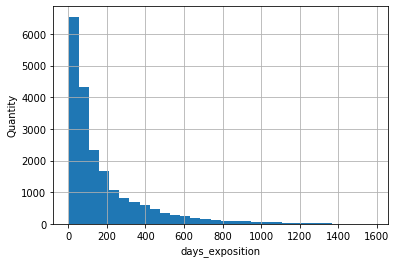

In [24]:
print(data['days_exposition'].isnull().sum())
data['days_exposition'].hist(bins=30).set_xlabel('days_exposition')
plt.ylabel('Quantity')
days_exposition_median = data['days_exposition'].median()
data['days_exposition'] = data['days_exposition'].fillna(days_exposition_median)
data['days_exposition'].isnull().sum()

Данные в days_exposition представлены распределением пуасона, пропуски можно заменить медианным значением.

In [25]:
data['floors_total'] = data['floors_total'].astype('int64')
data['days_exposition'] = data['days_exposition'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           8030 non-null float64
ponds_around3000

In [26]:
data['parks_nearest'] = data['parks_around3000'].fillna(0)
data['ponds_nearest'] = data['parks_around3000'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000 

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

* floors_total стоит заполнить пропуски и поменять тип на целое

* locality_name можно дропнуть пропуски, объективно восстановить сложно, к тому же их немного

* days_exposition стоит перевести в целое

* заполни пропуски по расстояниям и кол-ву прудов\парков


В некоторых случаях обычный astype может ругаться на наличие пропусков при переводе в int , поэтому можно использовать `df['col'] = df['col'].astype(pd.Int32Dtype())`

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Молодец, хорошо!

</div>

### Добавление значений в таблицу <a id='3'></a>

Добавлю в таблицу цену квадратного метра.

In [27]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 2)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,1,2,1,95,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,1,2,1,558,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,2,3,2,424,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,2,1,2,121,100000.00


Добавлю в таблицу день недели, месяц и год публикации объявления.

In [28]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,1,2,1,95,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0,0,0,0,81,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1,1,2,1,558,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,False,...,6800.0,2,2,3,2,424,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,2,1,2,121,100000.00,1,6,2018


Добавлю в таблицу этаж квартиры; варианты — первый, последний, другой.

In [29]:
print(data['floor'].unique())

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


In [30]:
#Функция, определяющая этаж квартиры
def floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

data['floor_category'] = data.apply(floor_category, axis = 1)
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,1,2,1,95,120370.37,3,3,2019,Другой
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,0,0,0,81,82920.79,1,12,2018,Первый
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,1,1,2,1,558,92785.71,3,8,2015,Другой
3,0,64900000,159.00,2015-07-24,3,NaN,14,45.00,9,False,...,2,2,3,2,424,408176.10,4,7,2015,Другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,2,1,2,121,100000.00,1,6,2018,Другой
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,0,0,0,55,95065.79,0,9,2018,Другой
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,0,0,0,155,99195.71,3,11,2017,Другой
7,5,7915000,71.60,2019-04-18,2,NaN,24,30.50,22,False,...,0,0,0,0,95,110544.69,3,4,2019,Другой
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,0,0,0,189,87454.76,2,5,2018,Другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,0,0,0,289,88524.59,6,2,2017,Другой


Добавлю в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [31]:
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_category,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,1,95,120370.37,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,0,81,82920.79,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,1,558,92785.71,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,45.0,9,False,...,3,2,424,408176.10,4,7,2015,Другой,0.283019,0.059748
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,2,121,100000.00,1,6,2018,Другой,0.320000,0.410000


<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Отлично, новые признаки успешно созданы!

</div>

## Иследовательский анализ данных: площадь, цена, число комнат, высота потолков <a id='4'></a>

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


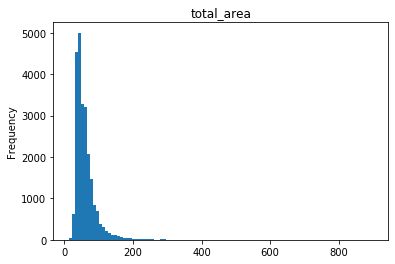

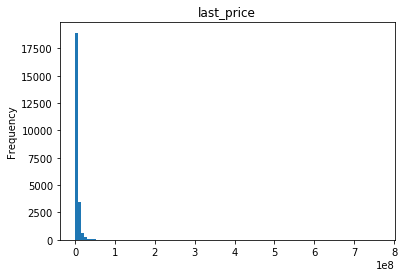

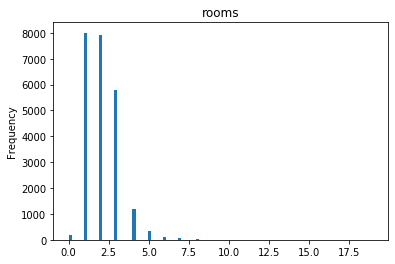

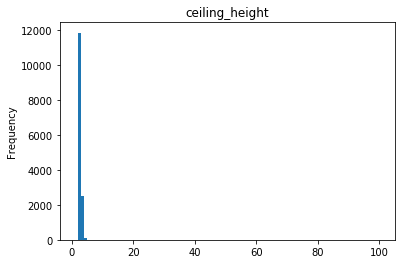

In [32]:
data_hist = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in data_hist:
    print(data[column].describe())
    
for column in data_hist:
    data[column].plot(title = column, kind = 'hist', bins = 100)
    plt.show()

Вывод по числу комнат: минимальное количество комнат 0, в дальнейшем отброшу эти значения. Максимальное - 19, стоит проверить. Имеются несколько значений у нуля, нужно узнать что это за значения. Чаще встречаются однокомнатные и двухкомнатные квартира.
Вывод по общей площади: минимум 12 кв. м., максимум 900 кв. м. Средний разборс 40 - 69 кв. м. На гистограмме выше 250 кв. м. значения даже не видно, с ними нужно будет поработать.
Вывод по цене: Максимальная цена - 763млн (могут быть квартиры премиум класса), минимальная цена - 12190. На гистограмме видно многие значения у нуля, минимальное значение подозрительно. Среднее значение значительно больше медианного.
Вывод по высоте потолков: минимальное значение - 1 метр, что скорее не реально, а максимальное - 100 метров, что так же представялется нереальным, скорее всего это выбросы.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Молодец, хорошие выводы

</div>

### Работа с общей площадью <a id='5'></a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Для отсечения выбросов мы можем написать функцию которая будет брать +- 1.5 межквартильных размаха

</div>

In [33]:
#print(data[data['total_area'] > 250])

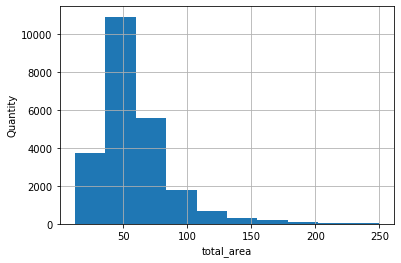

In [34]:
#Исключу площадь больше 250, квартир всего 112
data = data.query('total_area < 250')
data['total_area'].hist()
plt.xlabel('total_area')
plt.ylabel('Quantity')
plt.show()

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Оформи график

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

В целом хорошее отсечение

</div>

### Работа со стоимостью квартир <a id='6'></a>

In [35]:
data.sort_values('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_category,living_to_total_area,kitchen_to_total_area
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,1,8,111.83,2,3,2019,Последний,0.293578,0.371560
17456,7,430000,30.4,2019-04-22,1,NaN,2,16.0,1,False,...,0,0,95,14144.74,0,4,2019,Первый,0.526316,0.197368
14911,5,430000,54.0,2018-06-26,2,NaN,3,30.5,3,False,...,0,0,44,7962.96,1,6,2018,Последний,0.564815,0.161111
16274,18,440000,40.0,2018-07-10,1,NaN,5,17.6,1,False,...,0,0,45,11000.00,1,7,2018,Первый,0.440000,0.225000
17676,0,450000,36.5,2018-02-01,1,NaN,5,17.3,4,False,...,0,0,120,12328.77,3,2,2018,Другой,0.473973,0.232877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,11,150000000,230.0,2017-10-25,8,NaN,8,220.0,8,False,...,0,2,135,652173.91,2,10,2017,Последний,0.956522,0.108696
2536,16,159984000,242.4,2015-08-27,4,3.85,9,131.0,7,False,...,1,1,501,660000.00,3,8,2015,Другой,0.540429,0.082508
19155,20,160000000,243.0,2018-11-12,5,NaN,5,145.0,4,False,...,1,3,18,658436.21,0,11,2018,Другой,0.596708,0.135802
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,3,3,95,1542604.80,1,3,2019,Последний,0.339733,0.161067


Есть одна квартира, которая выбивается из общей массы, исключу ее.

In [36]:
data.drop(data.loc[data['last_price'] == 12190].index, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff063530690>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff063526a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff063526a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff063536b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff063530c90>],
 'means': []}

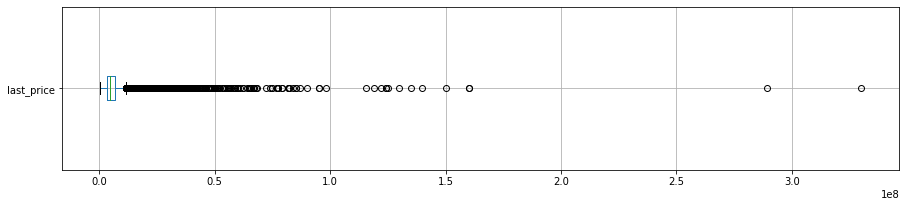

In [37]:
data.boxplot('last_price', vert = False, figsize = (15, 3), return_type = 'dict')

In [38]:
data.drop(data.loc[data['last_price'] > 11000000].index, inplace = True)

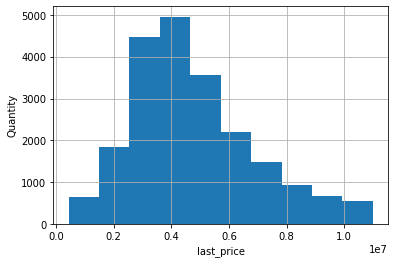

In [39]:
data['last_price'].hist()
plt.xlabel('last_price')
plt.ylabel('Quantity')
plt.show()

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Вероятно опечатка, цена слишком маленькая

</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Удали выбросы по цене

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

* Графики доработал (было бы конечно еще лучше если бы ты подписывал заголовки для них)

* Выбросы по цене убрал, молодец

</div>

### Работа с комнатами <a id='7'></a>

Отдельно расмотрю квартиры с 0 комнат.

In [40]:
data.query('rooms == 0')['rooms'].count()

192

In [41]:
data.query('rooms == 0 and studio == True')['rooms'].count()

134

Заменю число комнат на единицу у студий.

In [42]:
data.loc[data['studio'] == True, 'rooms'] = 1

In [43]:
data.query('rooms == 0')['rooms'].count()

58

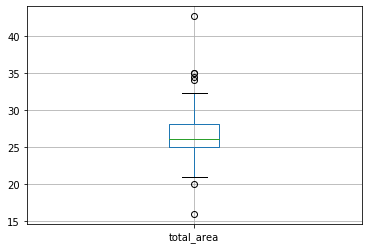

In [44]:
data.query('rooms == 0').boxplot('total_area')

В основном остались квартиры до 35 кв. м., присвою им единицу, остальные исключу из рассмотрения.

In [45]:
data.loc[data['total_area'] < 36, 'rooms'] = 1
data.query('rooms == 0')['rooms'].count()

1

In [46]:
data.drop(data.loc[data['rooms'] == 0].index, inplace = True)
data.query('rooms == 0')['rooms'].count()

0

### Работа с высотой потолков <a id='8'></a>

Оставлю квартиры с высотой потолков от 2.5 до 4 метров.

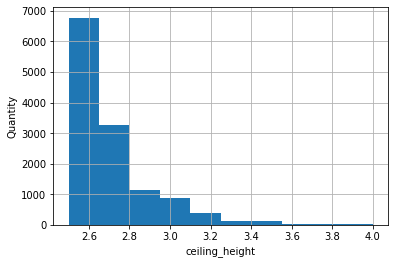

In [47]:
data.drop(data.loc[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2.5)].index, inplace = True)
data['ceiling_height'].hist()
plt.xlabel('ceiling_height')
plt.ylabel('Quantity')
plt.show()

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Хорошее решение молодец

</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Оформи график

</div>

### Время продажи квартиры <a id='9'></a>

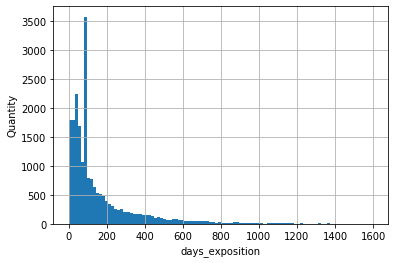

In [48]:
data['days_exposition'].hist(bins = 100, range = (0, 1600))
plt.xlabel('days_exposition')
plt.ylabel('Quantity')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff06365e890>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff063658c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff063658c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff06367cc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff06365ee90>],
 'means': []}

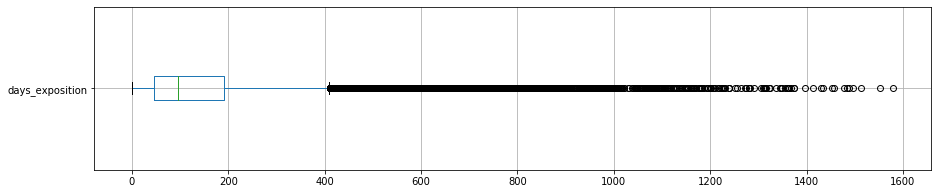

In [49]:
data.boxplot('days_exposition', vert = False, figsize = (15, 3), return_type = 'dict')

In [50]:
data.drop(data.loc[data['days_exposition'] > 1200].index, inplace = True)

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Оформи график

</div>

In [51]:
data['days_exposition'].describe()

count    21122.000000
mean       159.730471
std        189.408789
min          1.000000
25%         45.000000
50%         95.000000
75%        190.000000
max       1200.000000
Name: days_exposition, dtype: float64

Минимальное значение - один день. Допустим, что такое может быть, тем более на гистограмме видно, что значений около 0 достаточно много. Больше вопросов у максимального значение - 1580 дней. В целом, есть длинный хвост, после 1000 дней. Eсли продажа укладывается в 1 день - то это можнно считать очень быстрый разультат. В среднем продажа квартир занимает 160 дней.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Мне кажется оптимальнее считать, что все что до 1 квартиля быстрые продажи, между 1-3 обычные, а все что дальше 3 долгие

</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

По дням тоже стоит откинуть выбросы

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Было бы лучше еще сильнее урезать, скажем убрать все, что от 600

</div>

### Факторы влияющие на стоимость квартир <a id='10'></a>

Зависимоть цены от площади, числа комнат, удалённости от центра.

Коэффициент корреляции цены от площади: 0.6854041148861316
Коэффициент корреляции цены от комнат: 0.44685787918786996
Коэффициент корреляции цены от расстояния до центра: -0.33804848280480865


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0637e93d0>,
      dtype=object)

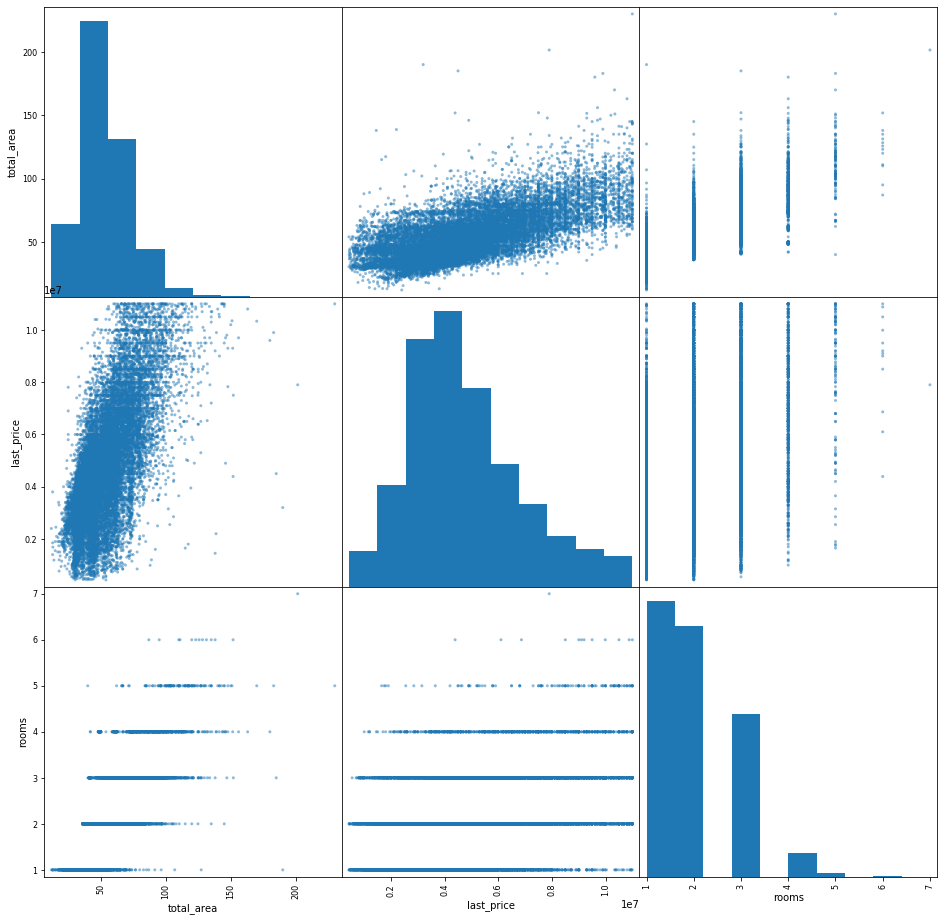

In [52]:
print('Коэффициент корреляции цены от площади:', data['last_price'].corr(data['total_area']))
print('Коэффициент корреляции цены от комнат:', data['last_price'].corr(data['rooms']))
print('Коэффициент корреляции цены от расстояния до центра:', data['last_price'].corr(data['cityCenters_nearest']))

pd.plotting.scatter_matrix(data.loc[:, ['total_area', 'last_price', 'rooms']], figsize = (16, 16))

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Было бы хорошо построить scatterplot, где бы мы смогли проследить зависимости

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Хороший график, на нем очень удобно проследить корреляцию

</div>

Анализируя взаимосвязь видно, что на стоимость в большей степени влияет площадь.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Согласен

</div>

Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [53]:
data_floor_corr = data.pivot_table(index = 'floor_category', values = 'last_price')
print(data_floor_corr)

                  last_price
floor_category              
Другой          4.954636e+06
Первый          4.106001e+06
Последний       4.412300e+06


Средняя стоимость на первом этаже самая низкая.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Первый этаж самый дешевый)

</div>

Зависимость от даты размещения: дня недели, месяца и года.

In [54]:
data.pivot_table(index = 'weekday_exposition', values = 'last_price')

,last_price
weekday_exposition,
0,4.771154e+06
1,4.795145e+06
2,4.809670e+06
3,4.765598e+06
4,4.757947e+06
5,4.699148e+06
6,4.716731e+06


Не удается выделить существенную разницу от дня недели.

In [55]:
data.pivot_table(index = 'month_exposition', values = 'last_price')

,last_price
month_exposition,
1,4.727565e+06
2,4.763128e+06
3,4.750830e+06
4,4.861718e+06
5,4.738511e+06
6,4.627534e+06
7,4.779909e+06
8,4.760123e+06
9,4.830007e+06


Также существенной разницы не заметно.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

В целом у нас отклонения в сотни тысяч, для кого то это может быть и существенным

</div>

In [56]:
data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'median'])

,mean,median
,last_price,last_price
year_exposition,,
2014,5.578477e+06,5500000
2015,5.087216e+06,4768714
2016,4.723908e+06,4299000
2017,4.696503e+06,4250000
2018,4.711829e+06,4350000
2019,5.050035e+06,4800000


Тут замечается снижение цены с 2014 года. Проверю данные на выбросы.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Кризис)

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Вообще как вариант все сводные таблички выше можно было отобразить на линейном графике, где по оси Х временные показатели (или же группа этажа, число комнат), а по У средняя цена

</div>

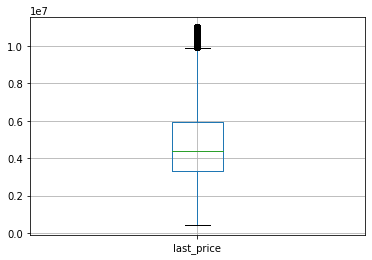

In [57]:
data.boxplot('last_price')

In [58]:
data.drop(data.loc[data['last_price'] > 11000000].index, inplace = True)

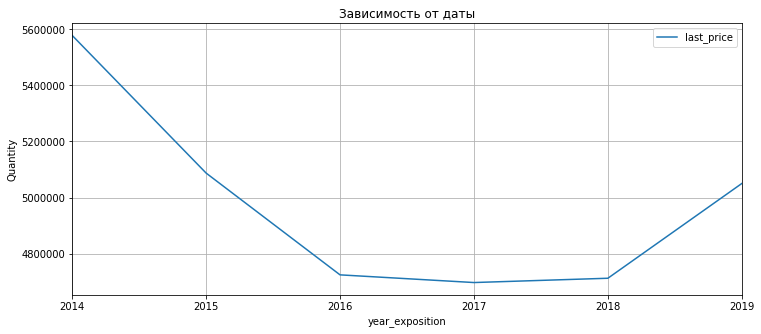

In [59]:
data.pivot_table(index = 'year_exposition', values = 'last_price').plot(grid = True, figsize = (12, 5))
plt.ylabel('Quantity')
plt.title('Зависимость от даты')
plt.show()

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Оформи график, подпиши ось У и заголовок

</div>

In [60]:
print(data['last_price'].corr(data['year_exposition']))

0.0074907988503192


Сложно оценить зависимость как существенную, это подтверждает коэффициент Пирсона. Таким образом, существенное влияние на стоимость оказывает площадь.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Ты правильно сделал, что с категориальными и временными показателями строил сводные, так зависимость прослеживается лучше, поэтому сделай выводы на основе них
    
Помимо этого дополни вывод, с чем еще у нас сильно коррелирует цена? Мне кажется расстояние, чем дальше от центра тем дешевле, комнаты, возможно высота потолков

</div>

### Населённые пункты с наибольшим числом объявлений, средняя цена за квадратный метр в этих пунктах <a id='11'></a>

In [61]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      13364
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             394
Колпино                335
Пушкин                 331
посёлок Парголово      325
Гатчина                304
деревня Кудрово        297
Выборг                 233
Name: locality_name, dtype: int64

In [62]:
#сохраню названия в список
locality_list = data['locality_name'].value_counts().head(10).index.tolist()
print(locality_list)

['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино', 'Пушкин', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


In [63]:
#Срез данных по названию пункта
locality_data = data.query('locality_name in @locality_list')
locality_data.pivot_table(index = 'locality_name', values = 'last_price').sort_values('last_price', ascending = False)

,last_price
locality_name,
Санкт-Петербург,5.567662e+06
Пушкин,5.306112e+06
посёлок Парголово,4.493232e+06
деревня Кудрово,4.208802e+06
посёлок Шушары,4.109809e+06
Колпино,3.842057e+06
Всеволожск,3.743239e+06
посёлок Мурино,3.672258e+06
Гатчина,3.423419e+06


Самая высокая стоимость в Санкт-Петербурге, низкая в Выборге.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Отлично! Можно было визуализировать табличку с помощью barcharts

</div>

### Анализ по квартирам в Санкт-Петербурге. <a id='12'></a>

In [64]:
spb = 'Санкт-Петербург'
spb_data =  data.query('locality_name == @spb')
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13364 entries, 2 to 23694
Data columns (total 29 columns):
total_images             13364 non-null int64
last_price               13364 non-null int64
total_area               13364 non-null float64
first_day_exposition     13364 non-null datetime64[ns]
rooms                    13364 non-null int64
ceiling_height           8512 non-null float64
floors_total             13364 non-null int64
living_area              13364 non-null float64
floor                    13364 non-null int64
is_apartment             13364 non-null bool
studio                   13364 non-null bool
open_plan                13364 non-null bool
kitchen_area             13364 non-null float64
balcony                  13364 non-null int64
locality_name            13364 non-null object
airports_nearest         13312 non-null float64
cityCenters_nearest      13324 non-null float64
parks_around3000         13364 non-null int64
parks_nearest            13364 non-null int64

добавлю новый столбец в датафрейм - расстояние до центра в км. Удалю nan значения по столбцам с расстоянием, так как необходимо исследование расстояния и переведу значение в целочисленное.

In [65]:
spb_data['center_km'] = spb_data['cityCenters_nearest'] / 1000
spb_data = spb_data.dropna(subset = ['cityCenters_nearest', 'center_km'])
spb_data = spb_data.reset_index(drop = True)
spb_data['center_km'] = spb_data['center_km'].astype('int')
spb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13324 entries, 0 to 13323
Data columns (total 30 columns):
total_images             13324 non-null int64
last_price               13324 non-null int64
total_area               13324 non-null float64
first_day_exposition     13324 non-null datetime64[ns]
rooms                    13324 non-null int64
ceiling_height           8491 non-null float64
floors_total             13324 non-null int64
living_area              13324 non-null float64
floor                    13324 non-null int64
is_apartment             13324 non-null bool
studio                   13324 non-null bool
open_plan                13324 non-null bool
kitchen_area             13324 non-null float64
balcony                  13324 non-null int64
locality_name            13324 non-null object
airports_nearest         13312 non-null float64
cityCenters_nearest      13324 non-null float64
parks_around3000         13324 non-null int64
parks_nearest            13324 non-null int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


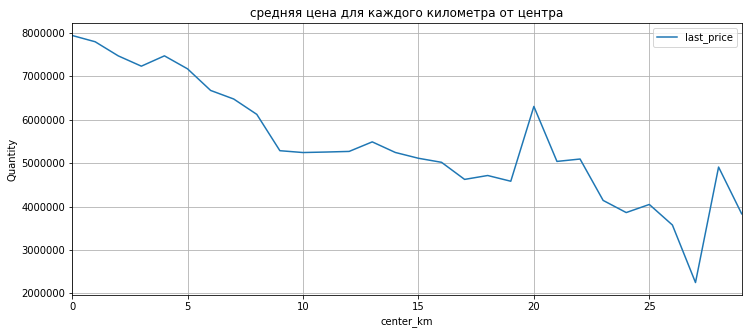

In [66]:
#средняя цена для каждого километра от центра
spb_data.pivot_table(index = 'center_km', values = 'last_price').plot(grid = True, figsize = (12, 5))
plt.ylabel('Quantity')
plt.title('средняя цена для каждого километра от центра')
plt.show()

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Оформи график

</div>

По графику видно, что цена снижается по мере расположения квартир от удалености от центра, после 5 км цена начинает резко снижаться, буду считать что заканчивается центральная зона.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Отлично, молодец

</div>

In [67]:
center_data = spb_data.query('center_km <= 5').reset_index(drop = True)
center_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 30 columns):
total_images             1682 non-null int64
last_price               1682 non-null int64
total_area               1682 non-null float64
first_day_exposition     1682 non-null datetime64[ns]
rooms                    1682 non-null int64
ceiling_height           1072 non-null float64
floors_total             1682 non-null int64
living_area              1682 non-null float64
floor                    1682 non-null int64
is_apartment             1682 non-null bool
studio                   1682 non-null bool
open_plan                1682 non-null bool
kitchen_area             1682 non-null float64
balcony                  1682 non-null int64
locality_name            1682 non-null object
airports_nearest         1680 non-null float64
cityCenters_nearest      1682 non-null float64
parks_around3000         1682 non-null int64
parks_nearest            1682 non-null int64
ponds_around3000   

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

В целом хорошее расстояние, молодец

</div>

1700 квартир расположенно в центральной части Санкт-Петербурга, теперь изучу параметры: площадь, цену, число комнат, высоту потолков.

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
   
В датафрейме Спб рекомендую далее создать новый категориальный признак «центр \ область за центром», для того чтобы делать совместные визуализации и сравнивать типичные параметры для центра Спб и области за пределами центра Спб

</div>

#### Влияние площади. <a id='13'></a>

In [68]:
print(center_data['total_area'].agg({'mean', 'max', 'min'}))
print(spb_data['total_area'].agg({'mean', 'max', 'min'}))

mean     67.652687
min      12.000000
max     190.000000
Name: total_area, dtype: float64
mean     54.075202
min      12.000000
max     190.000000
Name: total_area, dtype: float64


<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Стоит заметить, что spb_data сам по себе включает и центральную зону, лучше было бы анализировать и сравнивать прям центр \ область за центром

</div>

Средняя площадь квартир в центре больше, чем в среднем у всех квартир в Санкт-Петербурге.

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Оформи графики ниже

</div>

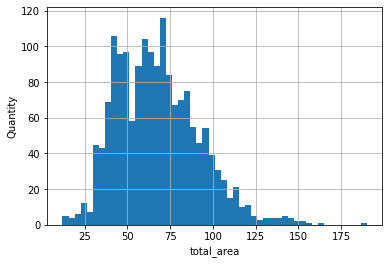

In [69]:
center_data['total_area'].hist(bins = 50)
plt.xlabel('total_area')
plt.ylabel('Quantity')
plt.show()

In [70]:
print(center_data['last_price'].agg({'mean', 'max', 'min'}))
print(spb_data['last_price'].agg({'mean', 'max', 'min'}))

mean    7.371954e+06
min     1.600000e+06
max     1.100000e+07
Name: last_price, dtype: float64
mean    5.564427e+06
min     1.190000e+06
max     1.100000e+07
Name: last_price, dtype: float64


Минимальная цена поменялась, самая дорогая квартира находится в центре, средняя за квартиры в центре также выше.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Да, квартиры в центре дороже

</div>

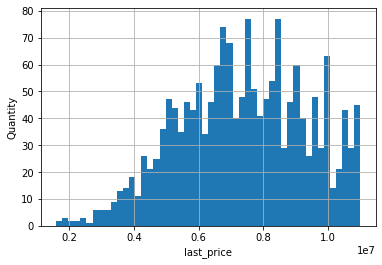

In [71]:
center_data['last_price'].hist(bins = 50)
plt.xlabel('last_price')
plt.ylabel('Quantity')
plt.show()

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Видим, что квартиры в центре у нас больше и дороже

</div>

#### Влияние количества комнат. <a id='14'></a>

In [72]:
room_center_spb = center_data.pivot_table(index = 'rooms', values = 'last_price')
room_spb = spb_data.pivot_table(index = 'rooms', values = 'last_price')
final = room_center_spb.join(room_spb, on = 'rooms', rsuffix='_y')
print(final)

         last_price  last_price_y
rooms                            
1      5.771364e+06  4.322084e+06
2      7.175392e+06  5.866623e+06
3      8.043537e+06  6.674269e+06
4      8.630582e+06  7.347470e+06
5      9.617451e+06  9.004734e+06
6      9.178333e+06  9.042400e+06


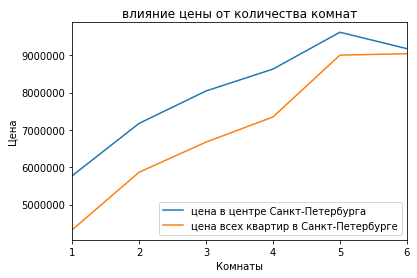

In [73]:
final.plot()
plt.ylabel('Цена')
plt.xlabel('Комнаты')
plt.title('влияние цены от количества комнат')
plt.legend(['цена в центре Санкт-Петербурга', 'цена всех квартир в Санкт-Петербурге'])
plt.show()

Влияние количества комнат на стоимость квартиры подтвердился.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Молодец, подправил 
    
Видим, что квартиры в центре стоят дороже в том же кол-ве комнат

</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Ну почему же, мы видим, как средняя цена стремительно растет в обоих случаях, причем по центру люди платят гораздо больше денег за недвижимость по сути с тем же кол-ом комнат
    
    
P.s. оформи оси, заголовок и легенду 

</div>

In [74]:
center_data['ceiling_height'].describe()

count    1072.000000
mean        3.050532
std         0.311771
min         2.500000
25%         2.800000
50%         3.000000
75%         3.200000
max         4.000000
Name: ceiling_height, dtype: float64

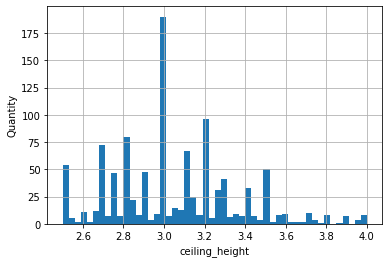

In [75]:
center_data['ceiling_height'].hist(bins = 50)
plt.xlabel('ceiling_height')
plt.ylabel('Quantity')
plt.show()

В среднеем высота потолков 3 метра.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Согласен, потолки по центру выше

</div>
<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
   
Оформи график
    
</div>

#### Влияние этажа. <a id='15'></a>

In [76]:
center_floor = center_data.pivot_table(index = 'floor', values = 'last_price')
spb_floor = spb_data.pivot_table(index = 'floor', values = 'last_price')

final_floor = spb_floor.merge(center_floor, on = 'floor', how = 'inner')
final_floor.columns = ['Ср. цена в СПб', 'Ср. цена в центре СПб']
print(final_floor)

       Ср. цена в СПб  Ср. цена в центре СПб
floor                                       
1        5.066348e+06           6.366052e+06
2        5.695246e+06           7.559006e+06
3        5.654733e+06           7.447261e+06
4        5.743930e+06           7.689281e+06
5        5.417674e+06           7.503204e+06
6        5.659535e+06           7.542005e+06
7        5.496578e+06           7.595609e+06
8        5.405690e+06           7.974575e+06
9        5.335561e+06           7.659792e+06
10       5.711759e+06           7.043828e+06
11       5.715588e+06           7.817557e+06
12       5.729308e+06           6.734657e+06
13       5.916345e+06           8.400000e+06
14       5.608007e+06           6.698892e+06
15       5.876629e+06           1.100000e+07
16       5.649793e+06           7.203654e+06
17       5.512395e+06           1.059000e+07
18       5.916974e+06           7.650000e+06
19       5.460981e+06           9.833970e+06


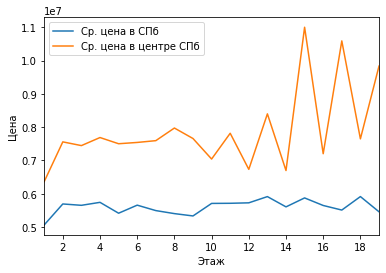

In [77]:
final_floor.plot()
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.show()

Общий тренд - на увеличение стоимости, в сравнении с первым этажом. Выпады по цене в центре, связаны скорее всего с последним этажом в доме.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Рекомендую провести сравнение по группе этажа. В целом мы видим, что цена на квартиры с тем же кол-ом комнат по центру дороже, квартиры на первом в обоих случаях стоят дешевле
    
</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Оформи график
    
</div>

In [78]:
center_distance = center_data.pivot_table(index = 'center_km', values = 'last_price')
spb_distance = spb_data.pivot_table(index = 'center_km', values = 'last_price')

final_distance = spb_distance.merge(center_distance, on = 'center_km', how = 'left')
final_distance.columns = ['Ср. цена в СПб', 'Ср. цена в центре СПб']
print(final_distance)

           Ср. цена в СПб  Ср. цена в центре СПб
center_km                                       
0            7.942211e+06           7.942211e+06
1            7.796817e+06           7.796817e+06
2            7.471740e+06           7.471740e+06
3            7.234506e+06           7.234506e+06
4            7.472320e+06           7.472320e+06
5            7.172944e+06           7.172944e+06
6            6.675548e+06                    NaN
7            6.477966e+06                    NaN
8            6.124066e+06                    NaN
9            5.287225e+06                    NaN
10           5.244948e+06                    NaN
11           5.256431e+06                    NaN
12           5.270515e+06                    NaN
13           5.490460e+06                    NaN
14           5.246480e+06                    NaN
15           5.112757e+06                    NaN
16           5.019710e+06                    NaN
17           4.626018e+06                    NaN
18           4.71576

С этим параметром сравнивать бессмыслено так как я сам определил зону в радиусе 5 км, он будет одинаков. Построю граффик для наглядности, цена будет снижаться в зависимости от дальности.

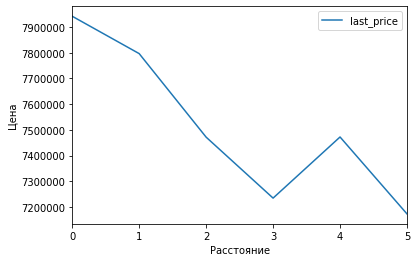

In [79]:
center_distance.plot()
plt.ylabel('Цена')
plt.xlabel('Расстояние')
plt.show()

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

* оформи график

    
</div>
<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Мы видим небольшое снижение с увеличением расстояния от центра (вероятно корреляция расстояния и цены для центра будет более близка к нулю, нежели для области за центром)
    
</div>

#### Влияние размещения объявления. <a id='16'></a>

Text(0, 0.5, 'last_price')

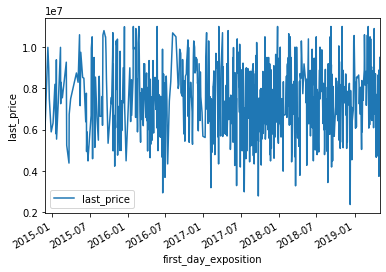

In [80]:
center_data.pivot_table(index = 'first_day_exposition', values = 'last_price').plot()
plt.ylabel('last_price')

Видимой зависимости нет. Сравню этот показатель с аналогичным для квартир во всем городе.

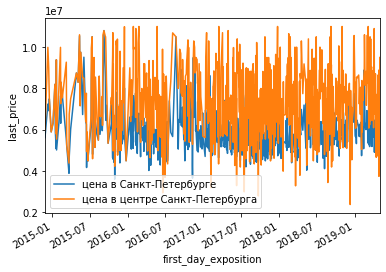

In [81]:
center_exposition = center_data.pivot_table(index = 'first_day_exposition', values = 'last_price')
spb_exposition = spb_data.pivot_table(index = 'first_day_exposition', values = 'last_price')

final_exposition = spb_exposition.merge(center_exposition, on = 'first_day_exposition', how = 'inner')
final_exposition.plot()
plt.ylabel('last_price')
plt.legend(['цена в Санкт-Петербурге', 'цена в центре Санкт-Петербурга'])
plt.show()

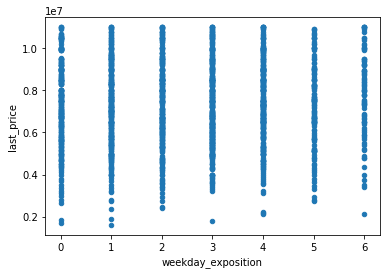

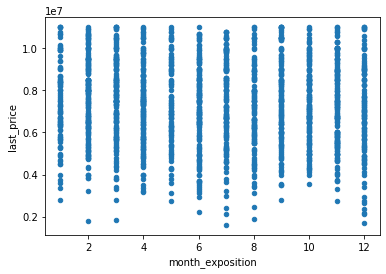

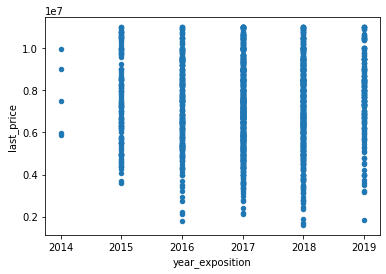

In [82]:
center_data.plot(x = 'weekday_exposition', y = 'last_price', kind = 'scatter')
center_data.plot(x = 'month_exposition', y = 'last_price', kind = 'scatter')
center_data.plot(x = 'year_exposition', y = 'last_price', kind = 'scatter')

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

Тут лучше было бы использовать сводную табличку с группировкой по временному показателю и измерением средней цены, отобразить лучше было с помощью линейного графика.

Однако в целом, если мы оценим твои графики, то заметим, как варьируется цена: наиболее сильная зависимость с годом, виден спад, потом есть вариация в зав-ти от месяцев и менее всего от дней (по твоим графикам удобнее оценивать вариацию по нижним хвостам, но опять же в будущем рекомендую тебе пользоваться сводными табличками и их визуализацией с помощью линейных графиков)

</div>

Зависимости нет.

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

* форми графики, подпиши заголовки, оси, осмысленную легенду

* вообще мне кажется что тут лучше было бы отображение через scatterplot

* Думаю когда ты доработаешь визуализации то зависимость заметишь (плюс мне кажется стоит посмотреть по месяцам \ дням \ годам по отедльности)
    
</div>

### Общий вывод <a id='17'></a>

Изучена база объявлений о продаже квартир. В изначальном датафрейме - 23699 строк, 22 столбца. Есть пропущенные значения.Заполнил пропущенные значения в столбцах. Посчитаны и добавлены в таблицу столбцы: price_per_sqm, weekday_exposition, month_exposition, year_exposition, floor_category, living_to_total_area, kitchen_to_total_area. Произвел замену типов. Изучены параметры: общая площадь, количество комнат, стоимость квартиры, высота потолков, время продажи квартиры. В которых отброшены выбивающиеся значения. В среднем продажи квартир занимают 160 дней. Исследование показало зависимость между ценой продажи и размером площади. Разброс цены увеличивается при увеличении комнат. Самая дорогая цена за квадратный метр в Санкт-Петербурге, низкая в Выборге.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 

В целом вывод стал лучше, можно было бы еще добавить про расстояние от центра — чем дальше, тем дешевле; квартиры на первом и последнем этаже дешевле, чем на этажах группы другой; есть небольшая зависимость с месяцами и днями, а вот с годами у нас явный спад, видимо кризисная ситуация. Зона центра где то около 5 км. Квартиры в центре у нас больше, дороже, имеют выше потолки и люди платят по сути за квартиры с той же комнатностью и площадью более высокие суммы.

</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Стоит не писать, что ты сделал, а чего достиг и узнал в ходе анализа:
    
* напиши типичные характеристики квартиры

* параметры с которыми она коррелирует 

* как цена меняется в зависимости от расстояния до центра, кол-ва комнат, этажа, даты

* какой предел центральной зоны и чем квартиры по центру отличаются от квартир за центром?


    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод 

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

У тебя получился классный проект! Однако есть несколько моментов, которые стоит доработать)
    
</div>